### Claim / Opinion Prediction with TikTok Data

**Introduction**
<p style = 'text-align: justify;'>
A machine learning model is going to be built to predict if a TikTok video contains 'Claims' or 'Opinions'. The purpose of this model is to minimize misinformation in TikTok videos. Previous studies suggest that when a video violates TikTok's Terms and Services, it mostly contains a 'Claim'. As a huge number of videos are created on the TikTok platform everyday, it is impossible to review each video that are reported by users as violation of the Terms and Services. Hence, a machine learning model built to identify videos containing 'Claims' and 'opinions' will be extremely beneficial. User reported videos containing 'Claims' will go through additional review process. Data was provided as a part of the Google Advanced Data Analytics Professional Certificate.
</p>

**Plan**
1. Identify Key features in the data and perform exploratory data analysis (EDA)
2. Perform feature engineering
3. Build machine learning models, compare their performance and select the champion model
4. Advise on future steps
 


In [167]:
# Import packages for data manipulation
import pandas as pd

# Import packages for data visualization
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

**Exploratory Data Analysis**

In [2]:
data = pd.read_csv('tiktok_dataset.csv')

In [3]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [6]:
# checking if there is any missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [7]:
# dropping rows with missing values
data = data.dropna(axis = 0).reset_index(drop = True)

In [8]:
# check for duplicated values
data.duplicated().sum()

np.int64(0)

In [9]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [10]:
# checking class imbalance
data['claim_status'].value_counts(normalize =  True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

In [11]:
data['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

32.46734511295012 31.775


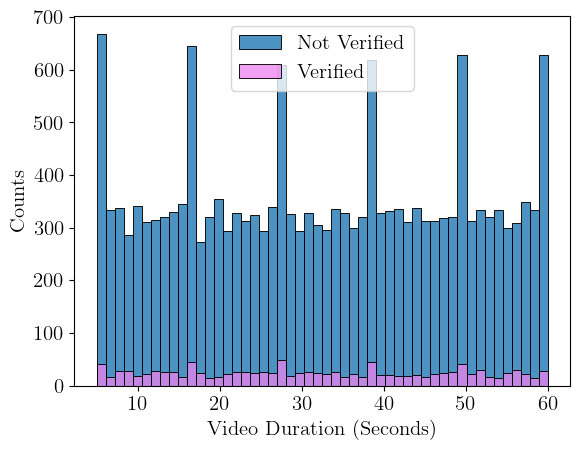

In [97]:
vid_len_verified = data[data['verified_status'] == 'verified']['video_duration_sec']
vid_len_unverified = data[data['verified_status'] == 'not verified']['video_duration_sec']
print(vid_len_unverified.mean(), vid_len_verified.mean())

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#plt.style.use('dark_background')
sns.histplot(vid_len_unverified, bins = 50, label = 'Not Verified', alpha = 0.8)
sns.histplot(vid_len_verified, bins = 50, label = 'Verified', color = 'violet')
plt.xlabel('Video Duration (Seconds)', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper center', fontsize = 15)
plt.show()

We observe that most videos are from unverified users. One interestinng observation to notice is that the video durations peak around every 10s of seconds for both user types. Average video duration between verified and unverified users are very similar ~32 seconds.

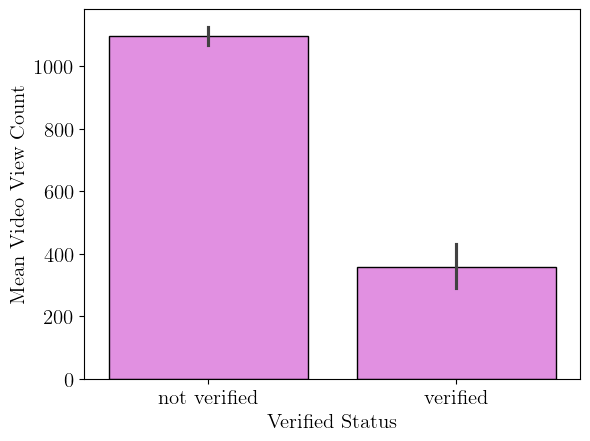

In [40]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

sns.barplot(data, x = 'verified_status', y = 'video_download_count', color = 'violet', edgecolor = 'k')
plt.xlabel('Verified Status', fontsize = 15)
plt.ylabel('Mean Video View Count', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

We observe that average video views from unverified accounts are greater than from verified accounts. Same trend is observed for likes, comments and downloads.

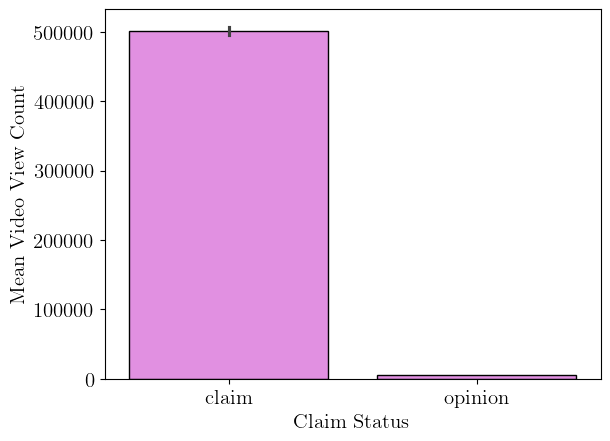

In [59]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

sns.barplot(data, x = 'claim_status', y = 'video_view_count', color = 'violet', edgecolor = 'k')
plt.xlabel('Claim Status', fontsize = 15)
plt.ylabel('Mean Video View Count', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

We observe that average views are greater for videos labeled as 'Claim'. Same trend is observed for likes, comments and downloads.

**Feature Engineering**

We aree going to perform feature transformation, drop irrelevant features, and prepare our data for model building.

In [62]:
data['text_length'] = data['video_transcription_text'].str.len()

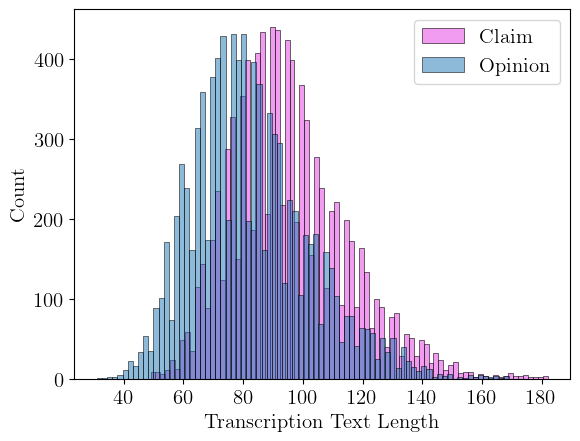

In [92]:
text_len_claim = data[data['claim_status'] == 'claim']['text_length']
text_len_opi = data[data['claim_status'] == 'opinion']['text_length']


sns.histplot(text_len_claim, bins = 80, edgecolor = 'k', color = 'violet', label = 'Claim', alpha = 0.8)
sns.histplot(text_len_opi, bins = 80, edgecolor = 'k', label = 'Opinion', alpha = 0.5)
plt.xlabel('Transcription Text Length', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Text length is mostly normally distributed with a slight skew towards right. Claim videos have more characters on average.

In [115]:
X = data.copy()
X = X.drop(['#', 'video_id', 'video_transcription_text'], axis = 1)
X['claim_status'] = X['claim_status'].map({'opinion': 0, 'claim': 1})
X = pd.get_dummies(X, columns = ['verified_status', 'author_ban_status'], drop_first = True)

In [116]:
# isolating Target Variable and features
y = X['claim_status']
X = X.drop(['claim_status'], axis = 1)

**Prepare Data for Model Building**

We are going to divide the data into three data sets, namely, Training data, Validation data and Test data in 60/20/20 ratio.

In [117]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size = 0.25, random_state = 0)

In [118]:
#check dimentions of our data sets
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 10), (3817, 10), (3817, 10), (11450,), (3817,), (3817,))

**Model Building and Evaluation**

The strategy I am going to follow is:
1. Build different models using cross-validation and hyperparameters tuning, and train them on the training data. 
2. Validate all the tuned models on the validation dataset and compare their performances.
3. Select the champion model and use it on the test data.
4. Compare our prediction with the observed data. 
5. Evaluate performance metrics.

I am going to build a hyperparameter tuned Random Forest model and a Tree-based XGBoost model, and cross-validate them over 5 folds of training data. For our needs, we have to prioritize identification of videos that violates TikTok's Terms and Service. Hence, we have to build a model that minimizes False Negatives. This is why I am choosing recall as my performance metric.

$$Recall = \frac{True \ positives}{True \ positives + False \ negatives}$$


**Random Forest Model**

In [129]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2, 3],
             'n_estimators': [75, 100, 200],
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = 'recall')

In [130]:
#train data
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [133]:
print(rf_cv.best_score_)
print(rf_cv.best_params_)

0.9908534395531852
{'max_depth': 5, 'max_features': 0.6, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}


**XGBoost Model**

In [134]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4, 8, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = 'recall')

In [135]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [138]:
print(xgb_cv.best_params_)
print(xgb_cv.best_score_)

{'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 300}
0.9898176171763818


In [141]:
y_pred_rf = rf_cv.best_estimator_.predict(X_val)
y_pred_rf

array([1, 0, 1, ..., 1, 1, 1])

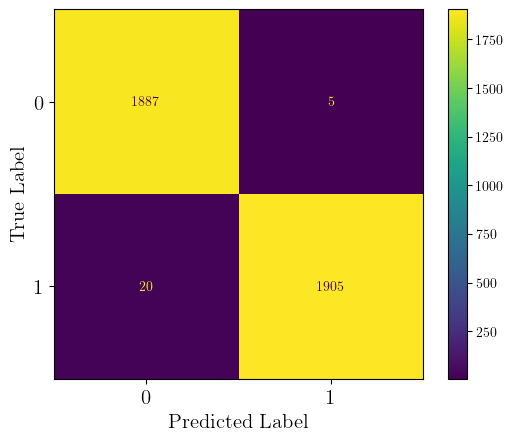

In [145]:
# Create a confusion matrix to visualize the results of the classification model

log_cm = confusion_matrix(y_val, y_pred_rf)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = None)
log_disp.plot()
plt.xlabel('Predicted Label', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [150]:
print("Random Forest Model Metrics Report")
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred_rf))
print("Precision:", "%.6f" % precision_score(y_val, y_pred_rf))
print("Recall:", "%.6f" % recall_score(y_val, y_pred_rf))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred_rf))

Random Forest Model Metrics Report
Accuracy: 0.993450
Precision: 0.997382
Recall: 0.989610
F1 Score: 0.993481


In [146]:
y_pred_xgb = xgb_cv.best_estimator_.predict(X_val)
y_pred_xgb

array([1, 0, 1, ..., 1, 1, 1])

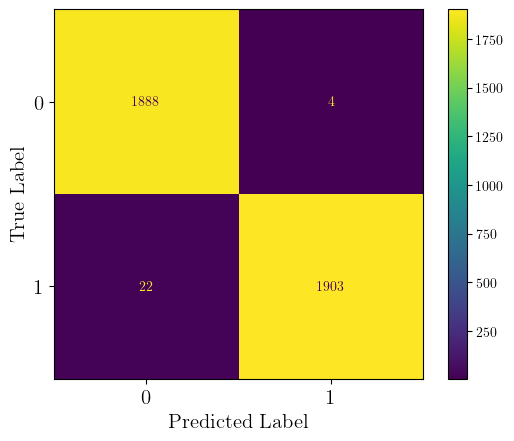

In [147]:
log_cm = confusion_matrix(y_val, y_pred_xgb)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = None)
log_disp.plot()
plt.xlabel('Predicted Label', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [151]:
print("XGBoost Model Metrics Report")
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred_xgb))
print("Precision:", "%.6f" % precision_score(y_val, y_pred_xgb))
print("Recall:", "%.6f" % recall_score(y_val, y_pred_xgb))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred_xgb))

XGBoost Model Metrics Report
Accuracy: 0.993188
Precision: 0.997902
Recall: 0.988571
F1 Score: 0.993215


**Choose Champion Model**

Both Random Forest and XGBoost models performed extremely well. Random Forest model performed ever so slightly better than the XGBoost model on the validation data set with a recall score of 0.9896. XGBost model has a recall score of 0.9885. Hence, I am choosing Random Forest as champion model.

In [148]:
y_pred = rf_cv.best_estimator_.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

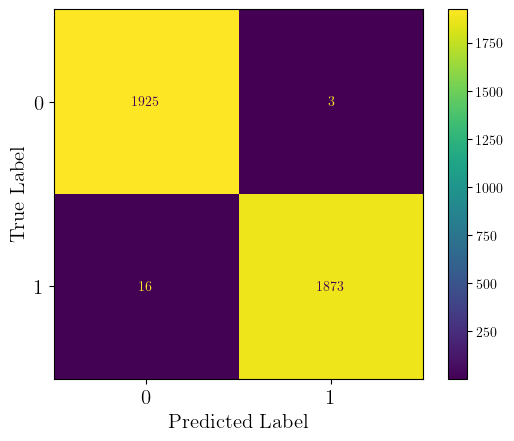

In [149]:
log_cm = confusion_matrix(y_test, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = None)
log_disp.plot()
plt.xlabel('Predicted Label', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [153]:
print("Random Forest Model Metrics Report on Test Data")
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

Random Forest Model Metrics Report on Test Data
Accuracy: 0.995022
Precision: 0.998401
Recall: 0.991530
F1 Score: 0.994954


**Feature Importance**

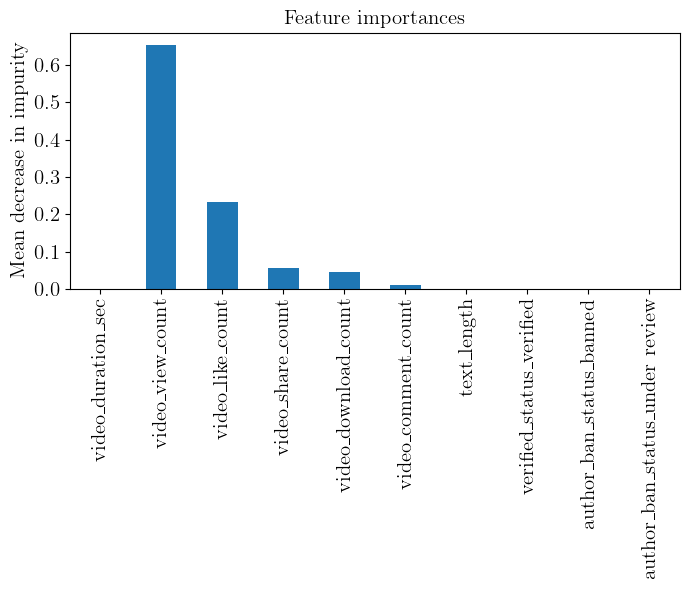

In [165]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index = X_test.columns)

fig, ax = plt.subplots(figsize = (7, 6))
rf_importances.plot.bar(ax = ax)
ax.set_title('Feature importances', fontsize = 15)
ax.set_ylabel('Mean decrease in impurity', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
fig.tight_layout()


**Conclusion**

The Random Forest Model performed very well on the test data and can be recommended for further use. It has a recall and F1 score of 0.9915 and 0.995 respectively. We notice that video views is identified as the most important featue in the model, but other user engagement metrics are also important. One way to improve the model further is to include additional features like 'number of times a video was reported' and 'number of users a video was reported by' etc.